In [3]:
import os
import gc
import sys
import glob
import numpy as np
import pandas as pd
import netCDF4 as nc
from datetime import datetime, timedelta
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as mticker

In [4]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/PLUMBER2/LSM_GPP_PLUMBER2')
from PLUMBER2_GPP_common_utils import *

In [5]:
# Path of PLUMBER 2 dataset
PLUMBER2_path      = "/g/data/w97/mm3972/data/PLUMBER2/"
PLUMBER2_flux_path = "/g/data/w97/mm3972/data/Fluxnet_data/Post-processed_PLUMBER2_outputs/Nc_files/Flux/"
PLUMBER2_met_path  = "/g/data/w97/mm3972/data/Fluxnet_data/Post-processed_PLUMBER2_outputs/Nc_files/Met/"
site_names, IGBP_types, clim_types, model_names = load_default_list()

## Plot for each site

In [16]:
model_colors ={0:'red', 1: 'darkorange',2:'orange',3:'gold',4:'yellowgreen',5:'green',6:'mediumseagreen',
               7:'lime',8:'aquamarine',9:'cyan',10:'dodgerblue',11:'blue',12:'darkolivegreen',
               13:'forestgreen',14:'lime',15:'gold', 16:'orange',17:'pink',18:'pink',19:'red',20:'deeppink',
               21:'mediumorchid',22: 'darkviolet',}

<h3 style="color:blue;">Get model list</h3>  

In [7]:
PLUMBER2_path_site = "/g/data/w97/mm3972/scripts/PLUMBER2/LSM_GPP_PLUMBER2/nc_files/AU-How.nc"
f                  = nc.Dataset(PLUMBER2_path_site, mode='r')
model_list         = f.variables['NEE_models'][:]
model_list         = model_list.tolist()
model_list.append('obs')

In [8]:
model_list

['1lin',
 '3km27',
 '6km729',
 '6km729lag',
 'RF_eb',
 'RF_raw',
 'LSTM_eb',
 'LSTM_raw',
 'CABLE',
 'CABLE-POP-CN',
 'CHTESSEL_Ref_exp1',
 'GFDL',
 'MuSICA',
 'NoahMPv401',
 'ORC2_r6593',
 'ORC3_r8120',
 'QUINCY',
 'STEMMUS-SCOPE',
 'obs']

In [11]:
time       = nc.num2date(f.variables['CABLE_time'][:],f.variables['CABLE_time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
ntime      = len(time)
month      = np.zeros(ntime)
hour       = np.zeros(ntime)

for i,t in enumerate(time):
    month[i] = t.month
    hour[i]  = t.hour

<h3 style="color:blue;">Check monthly diurnal cycle</h3>

#### Obs

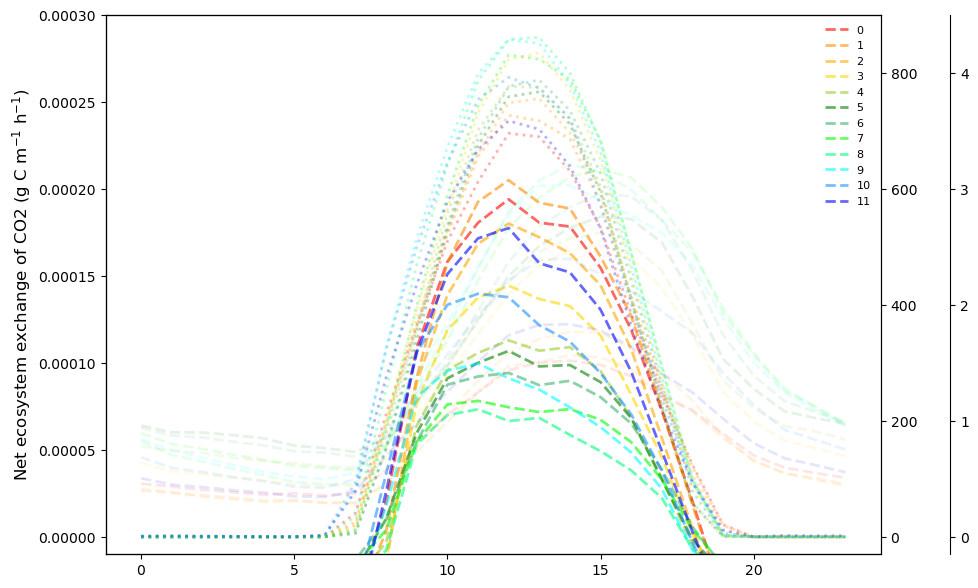

In [49]:
model_in      = 'obs'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables[model_in+'_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### 1lin

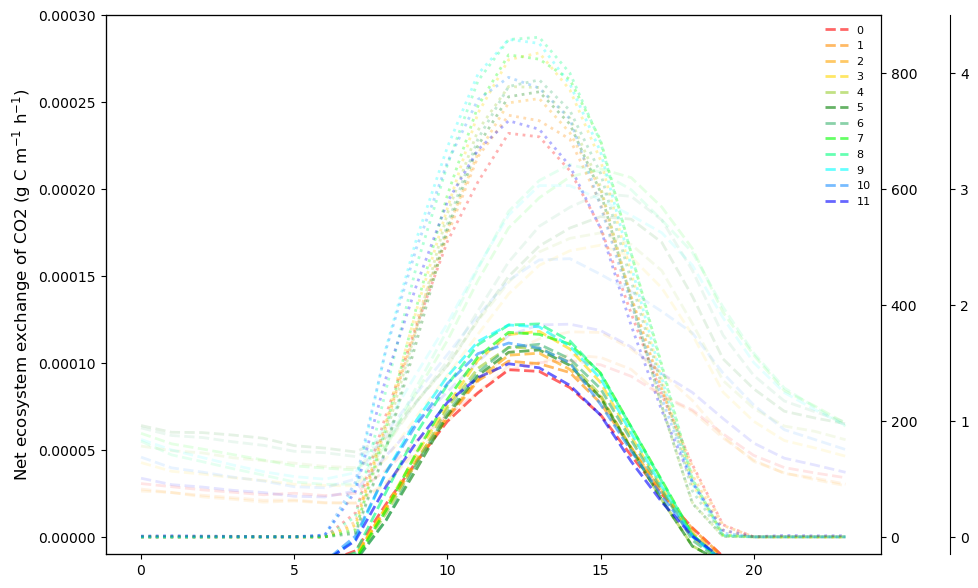

In [45]:
model_in      = '1lin'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### 3km27

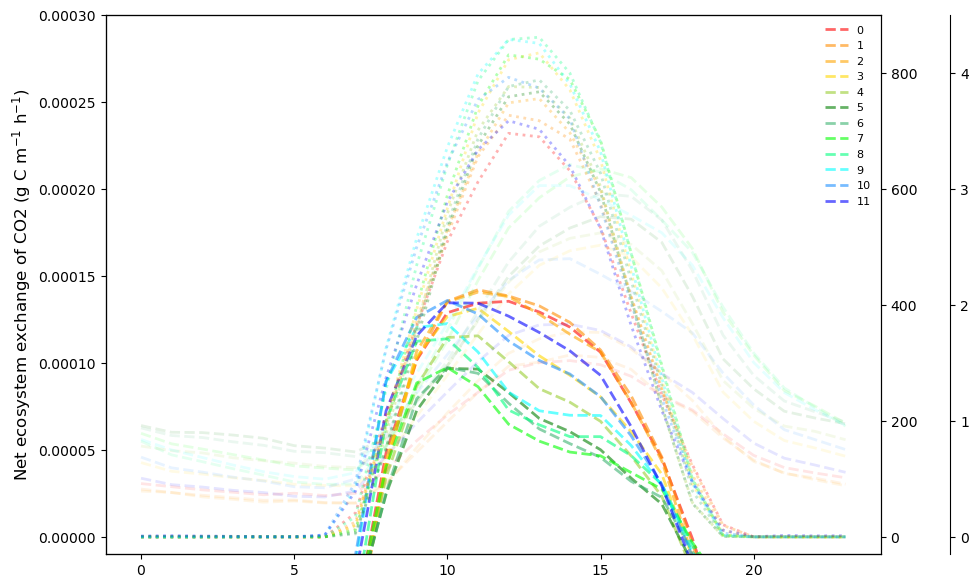

In [63]:
model_in      = '3km27'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### 6km729

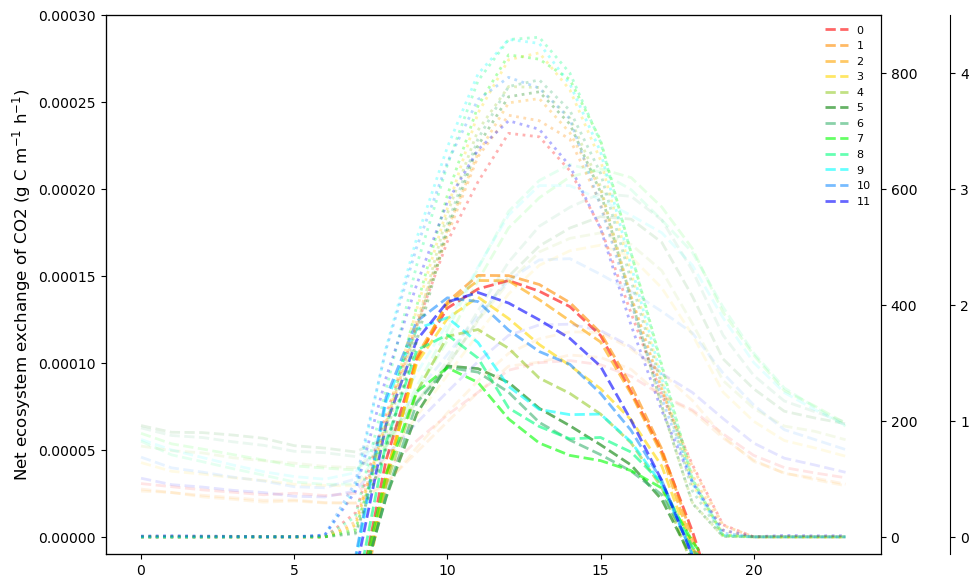

In [62]:
model_in      = '6km729'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### 6km729lag

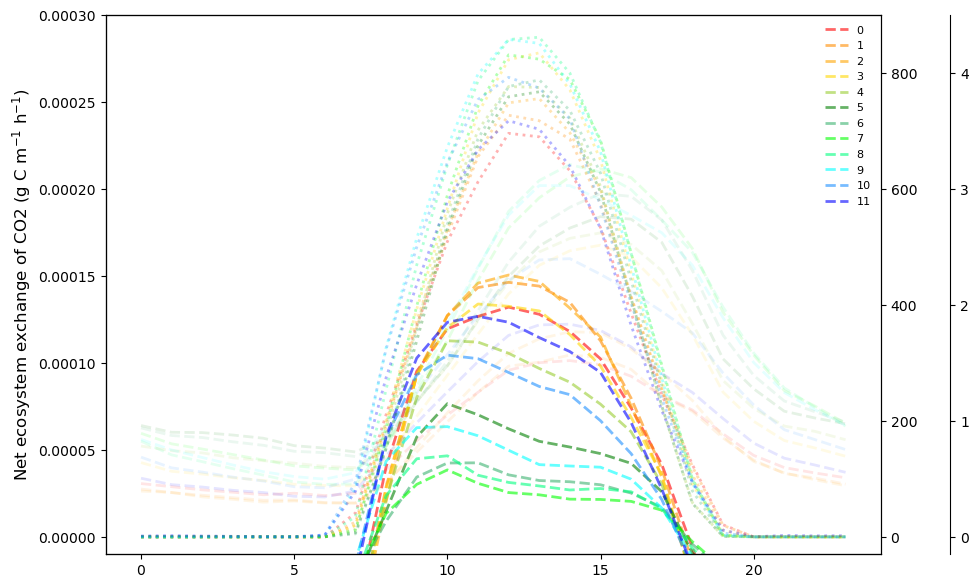

In [61]:
model_in      = '6km729lag'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### RF_eb

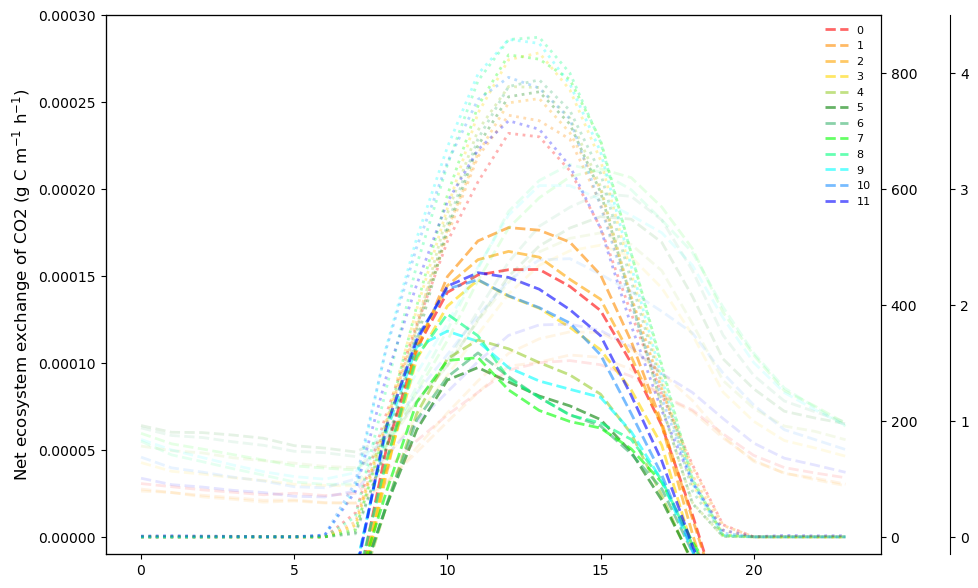

In [64]:
model_in      = 'RF_eb'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### RF_raw

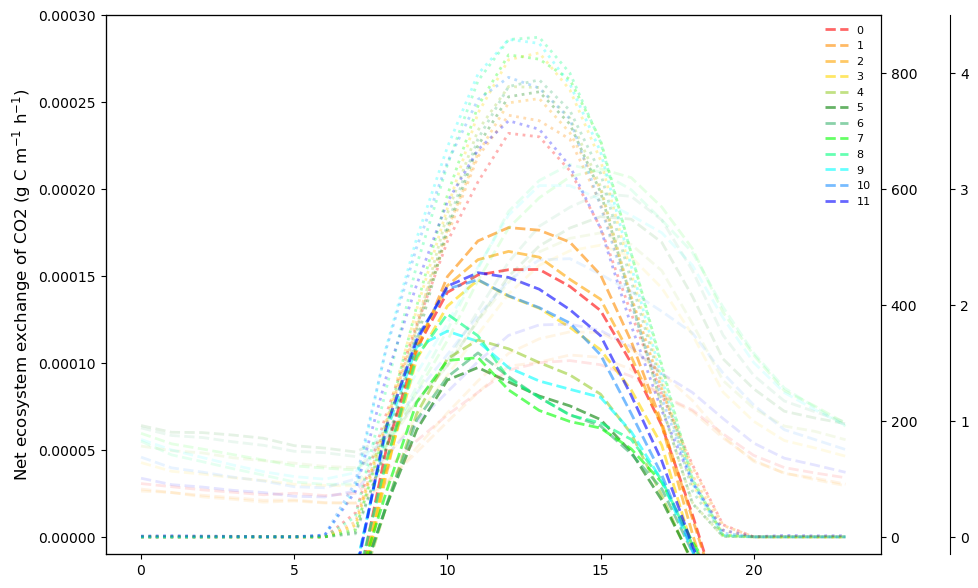

In [60]:
model_in      = 'RF_raw'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### LSTM_eb

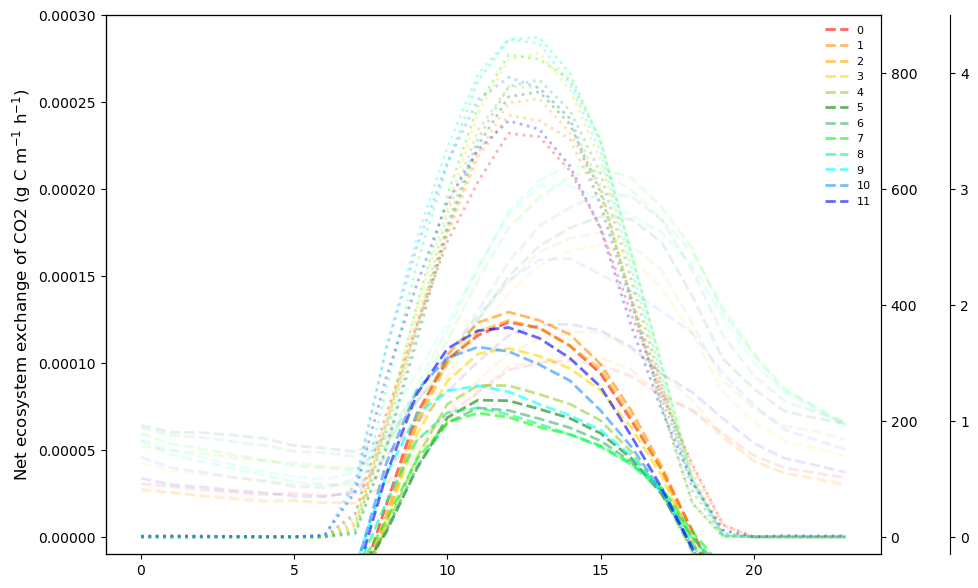

In [58]:
model_in      = 'LSTM_eb'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### LSTM_raw

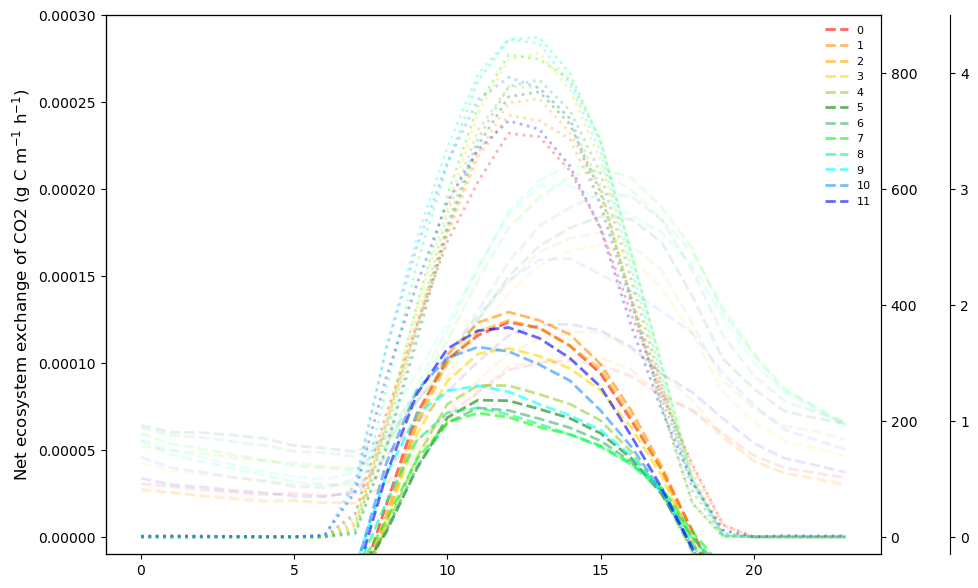

In [48]:
model_in      = 'LSTM_raw'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)
    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### CABLE

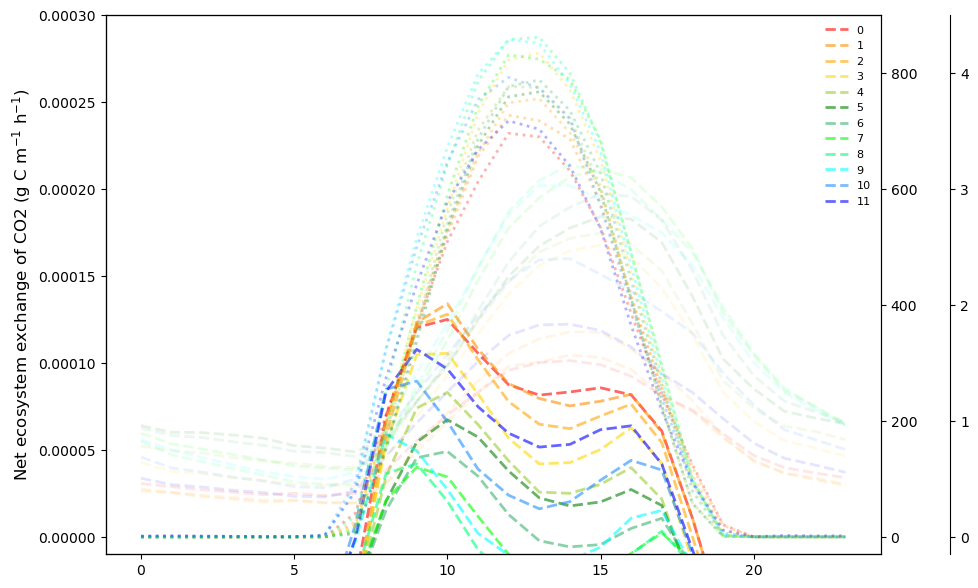

In [50]:
model_in      = 'CABLE'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### CABLE-POP-CN

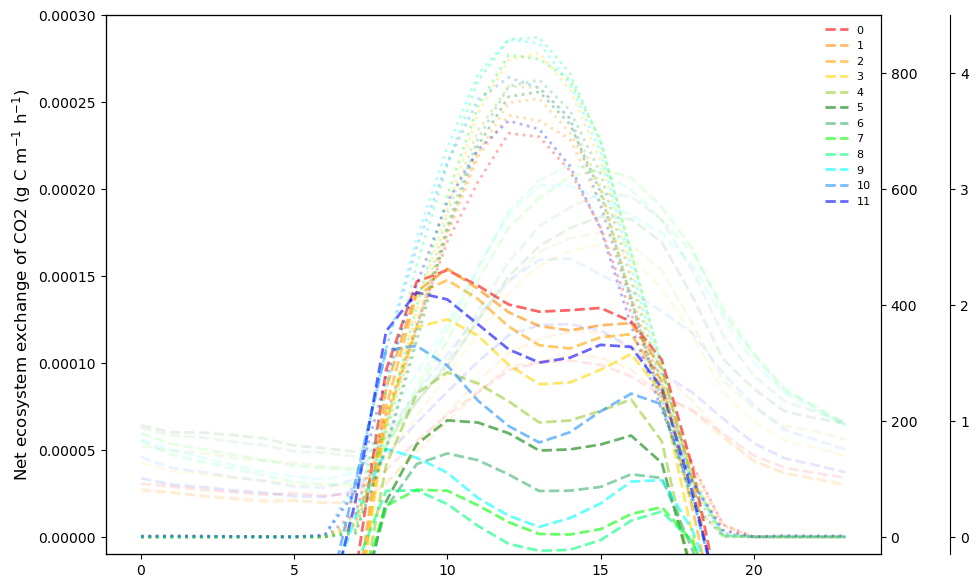

In [51]:
model_in      = 'CABLE-POP-CN'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### GFDL

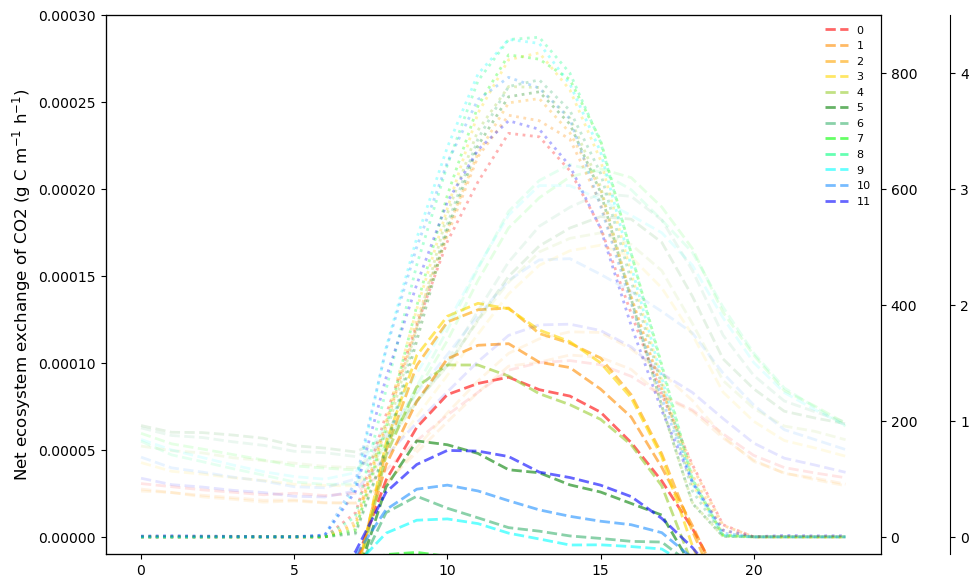

In [52]:
model_in      = 'GFDL'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### Noah MP

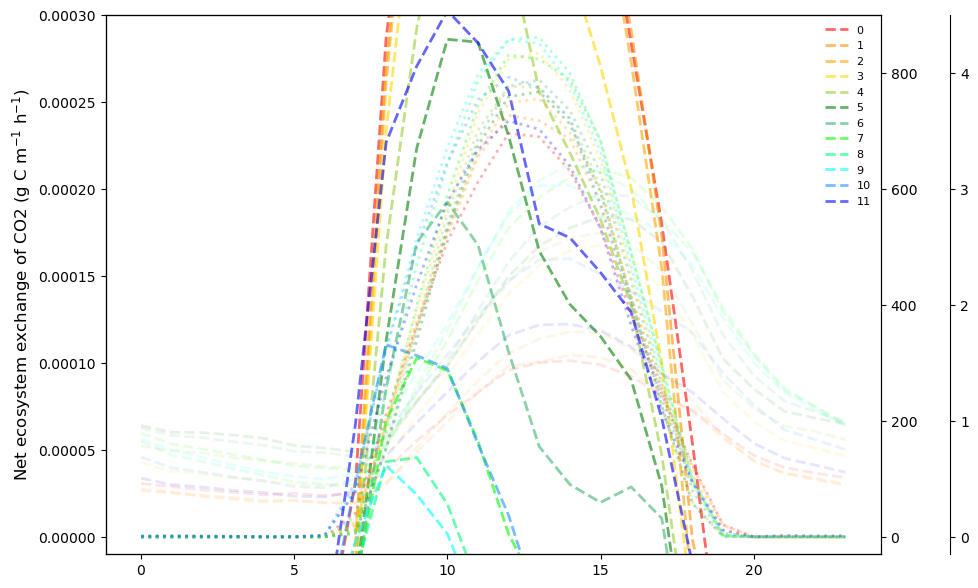

In [54]:
model_in      = 'NoahMPv401'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### MuSICA

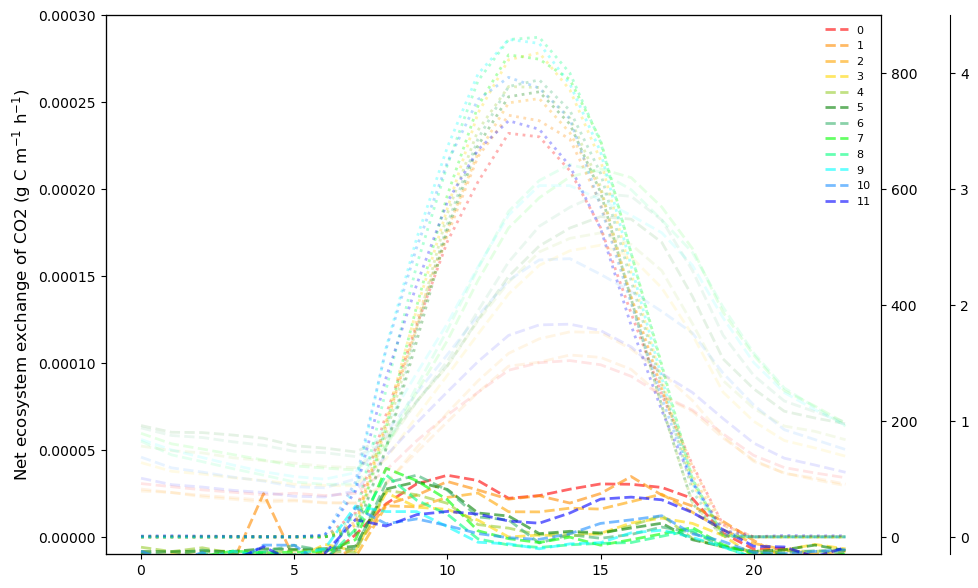

In [55]:
model_in      = 'MuSICA'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### STEMMUS-SCOPE

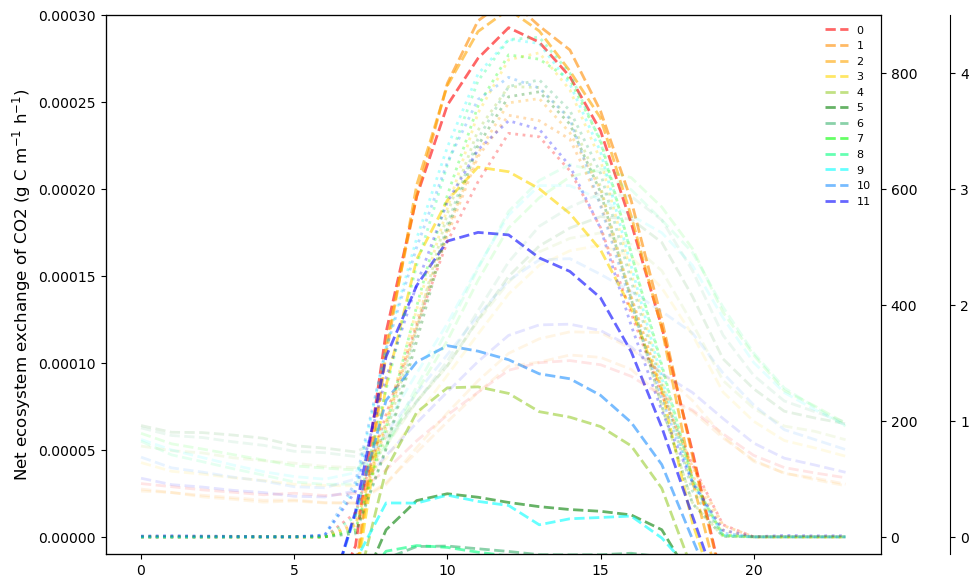

In [56]:
model_in      = 'STEMMUS-SCOPE'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    # sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    else:
        sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

#### JULES_GL9

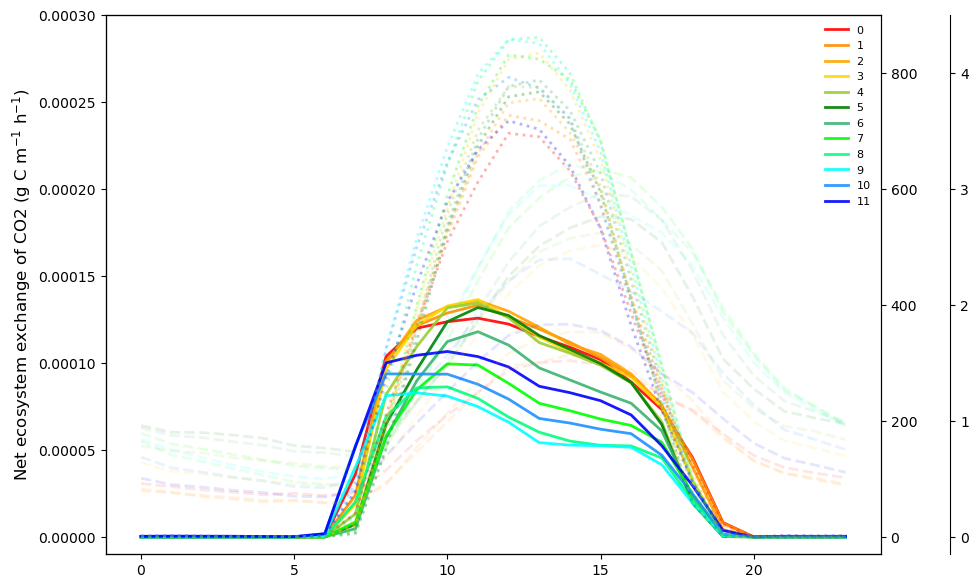

In [21]:
model_in      = 'JULES_GL9'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_GPP'][:].data, columns=['GPP'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour


ax2 = ax.twinx()
ax3 = ax.twinx()

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)

    
    sct = ax.plot(var_diurnal_cycle['GPP'], lw=2.0, color=model_colors[m], alpha=0.9, label=str(m))
    
#     if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
#         sct = ax.plot(var_diurnal_cycle['NEE'], lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
#     else:
#         sct = ax.plot(var_diurnal_cycle['NEE']*(-1), lw=2.0, color=model_colors[m], alpha=0.6, ls='--', label=str(m))
    
    # sct = ax2.plot(var_diurnal_cycle['Qle'], lw=2.0, color=model_colors[m], alpha=0.6, ls='-.')
    sct = ax2.plot(var_diurnal_cycle['SWdown'], lw=2.0, color=model_colors[m], alpha=0.3, ls=':')
    sct = ax3.plot(var_diurnal_cycle['VPD'], lw=2.0, color=model_colors[m], alpha=0.1, ls='--')
    ax3.spines["right"].set_position(("outward", 50))
    ax.set_ylabel("Net ecosystem exchange of CO2 (g C m$\mathregular{^{-1}}$ h$\mathregular{^{-1}}$)", fontsize=12)
    
    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.00001, 0.0003)
    ax2.set_ylim(-30, 900)
    ax3.set_ylim(-0.15, 4.5)

plt.show()

<h3 style="color:blue;">Check diurnal hysteresis</h3> 

#### Obs

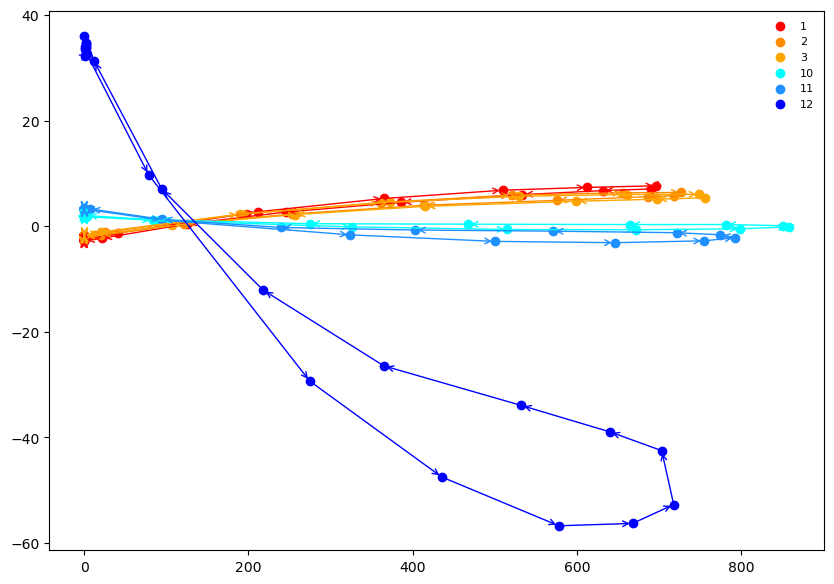

In [50]:
model_in      = 'GFDL'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
# var           = pd.DataFrame(f.variables[model_in+'_GPP'][:].data, columns=['GPP'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
# var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour

if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
    var.loc[:,'NEE'] = var['NEE'][:]
else:
    var.loc[:,'NEE'] = var['NEE'][:]*(-1)

var_name1     = "SWdown"
var_name2     = "NEE" 

for m in [0,1,2,9,10,11]:
# for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)
    
    var2_mean              = np.mean(var_diurnal_cycle[var_name2])
    var2_diurnal_cycle_std = var_diurnal_cycle[var_name2]/var2_mean
    ax.scatter(var_diurnal_cycle[var_name1],var2_diurnal_cycle_std, c=model_colors[m], label=str(m+1))
    
    for i in np.arange(1,24):  # Start from 1 to access the previous point
        ax.annotate("",
                    xy=(var_diurnal_cycle[var_name1][i], var2_diurnal_cycle_std[i]),
                    xytext=(var_diurnal_cycle[var_name1][i-1], var2_diurnal_cycle_std[i-1]),
                    arrowprops=dict(arrowstyle="->", color=model_colors[m]))

    ax.legend(fontsize=8,frameon=False)
    # ax.set_ylim(-0.0001, 0.00025)

plt.show()
var = None

Caution: when use day mean to divide the diurnal cycle, cold season with low GPP or NEE may have very large hysteresis cycles. 

#### CABLE

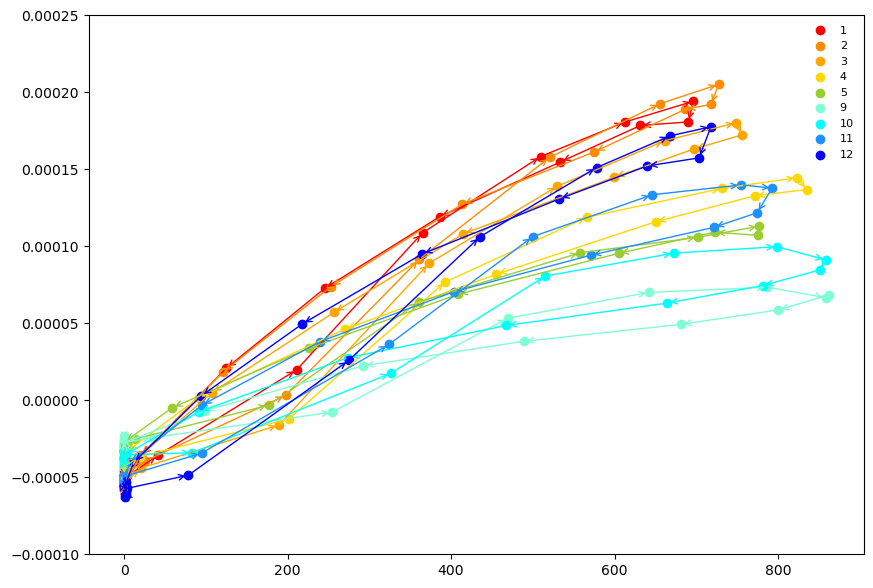

In [35]:
model_in      = 'obs'
fig, ax       = plt.subplots(figsize=[10, 7])

var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['GPP']    = f.variables[model_in+'_GPP'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour

if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
    var.loc[:,'NEE'] = var['NEE'][:]
else:
    var.loc[:,'NEE'] = var['NEE'][:]*(-1)

var_name1     = "SWdown"
var_name2     = "NEE" 


for m in [0,1,2,3,4,8,9,10,11]:
# for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)
    
    ax.scatter(var_diurnal_cycle[var_name1],var_diurnal_cycle[var_name2], c=model_colors[m], label=str(m+1))
    
    for i in np.arange(1,24):  # Start from 1 to access the previous point
        ax.annotate("",
                    xy=(var_diurnal_cycle[var_name1][i], var_diurnal_cycle[var_name2][i]),
                    xytext=(var_diurnal_cycle[var_name1][i-1], var_diurnal_cycle[var_name2][i-1]),
                    arrowprops=dict(arrowstyle="->", color=model_colors[m]))

    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.0001, 0.00025)

plt.show()
var = None

#### LSTM_raw

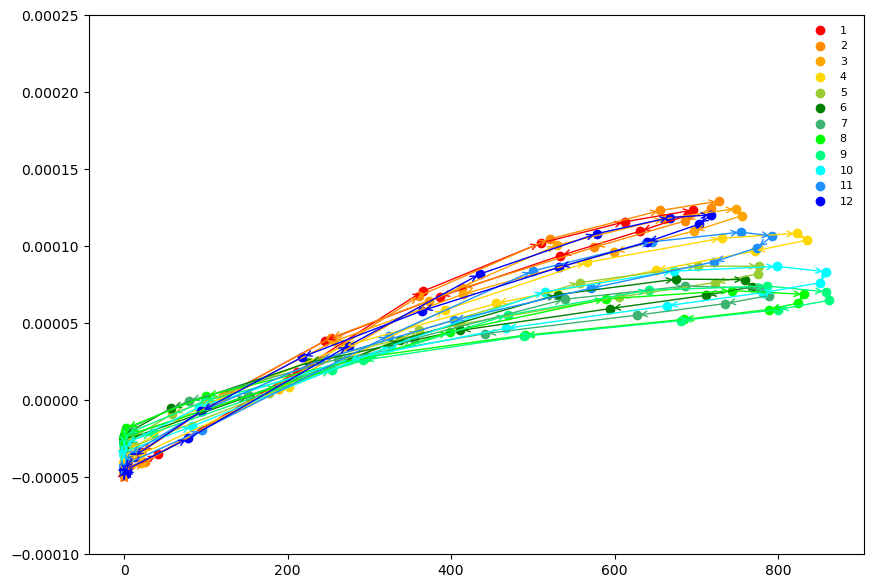

In [62]:
model_in      = 'LSTM_raw'
fig, ax       = plt.subplots(figsize=[10, 7])
try:
    var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
except:
    var           = pd.DataFrame(f.variables[model_in+'_GPP'][:].data, columns=['GPP'])
    
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour

if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
    var.loc[:,'NEE'] = var['NEE'][:]
else:
    var.loc[:,'NEE'] = var['NEE'][:]*(-1)

var_name1     = "SWdown"
var_name2     = "NEE" 

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)
    
    ax.scatter(var_diurnal_cycle[var_name1],var_diurnal_cycle[var_name2], c=model_colors[m], label=str(m+1))
    
    for i in np.arange(1,24):  # Start from 1 to access the previous point
        ax.annotate("",
                    xy=(var_diurnal_cycle[var_name1][i], var_diurnal_cycle[var_name2][i]),
                    xytext=(var_diurnal_cycle[var_name1][i-1], var_diurnal_cycle[var_name2][i-1]),
                    arrowprops=dict(arrowstyle="->", color=model_colors[m]))

    ax.legend(fontsize=8,frameon=False)
    ax.set_ylim(-0.0001, 0.00025)

plt.show()
var = None

#### JULES_GL9

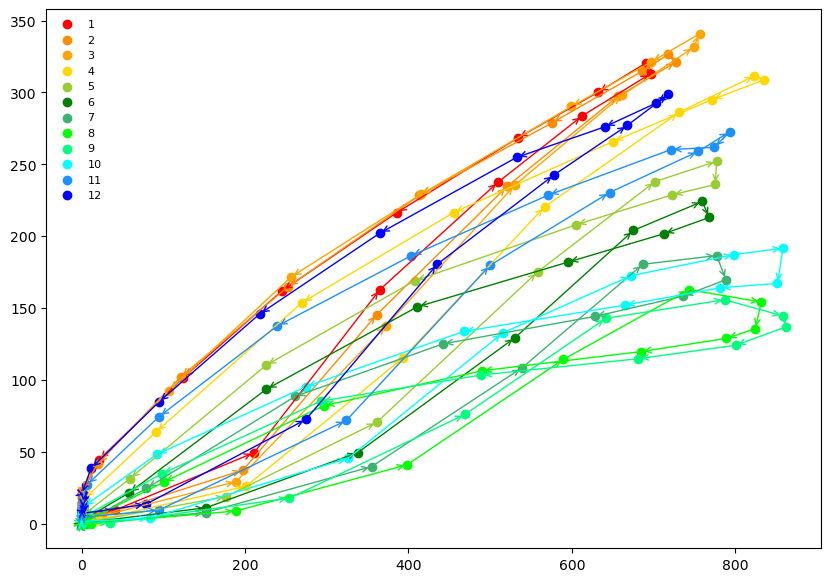

In [67]:
model_in      = 'JULES_GL9'
fig, ax       = plt.subplots(figsize=[10, 7])
try:
    var           = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
    if model_in == 'NoahMPv401' or model_in == 'GFDL' or model_in == 'STEMMUS-SCOPE':
        var.loc[:,'NEE'] = var['NEE'][:]
    else:
        var.loc[:,'NEE'] = var['NEE'][:]*(-1)
    var['GPP']    = f.variables[model_in+'_GPP'][:].data
except:
    var       = pd.DataFrame(f.variables[model_in+'_GPP'][:].data, columns=['GPP'])
    
var['Qle']    = f.variables[model_in+'_Qle'][:].data
var['SWdown'] = f.variables['obs_SWdown'][:].data
var['VPD']    = f.variables['VPD'][:].data
var['month']  = month
var['hour']   = hour

var_name1     = "SWdown"
var_name2     = "Qle"

for m in np.arange(12):
    var_masked        = var[month == m+1]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)
    
    ax.scatter(var_diurnal_cycle[var_name1],var_diurnal_cycle[var_name2], c=model_colors[m], label=str(m+1))
    
    for i in np.arange(1,24):  # Start from 1 to access the previous point
        ax.annotate("",
                    xy=(var_diurnal_cycle[var_name1][i], var_diurnal_cycle[var_name2][i]),
                    xytext=(var_diurnal_cycle[var_name1][i-1], var_diurnal_cycle[var_name2][i-1]),
                    arrowprops=dict(arrowstyle="->", color=model_colors[m]))

    ax.legend(fontsize=8,frameon=False)
    # ax.set_ylim(-0.0001, 0.00025)

plt.show()
var = None